In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\crop\crop_yield.csv")

In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

DRAWING A PAIRPLOT

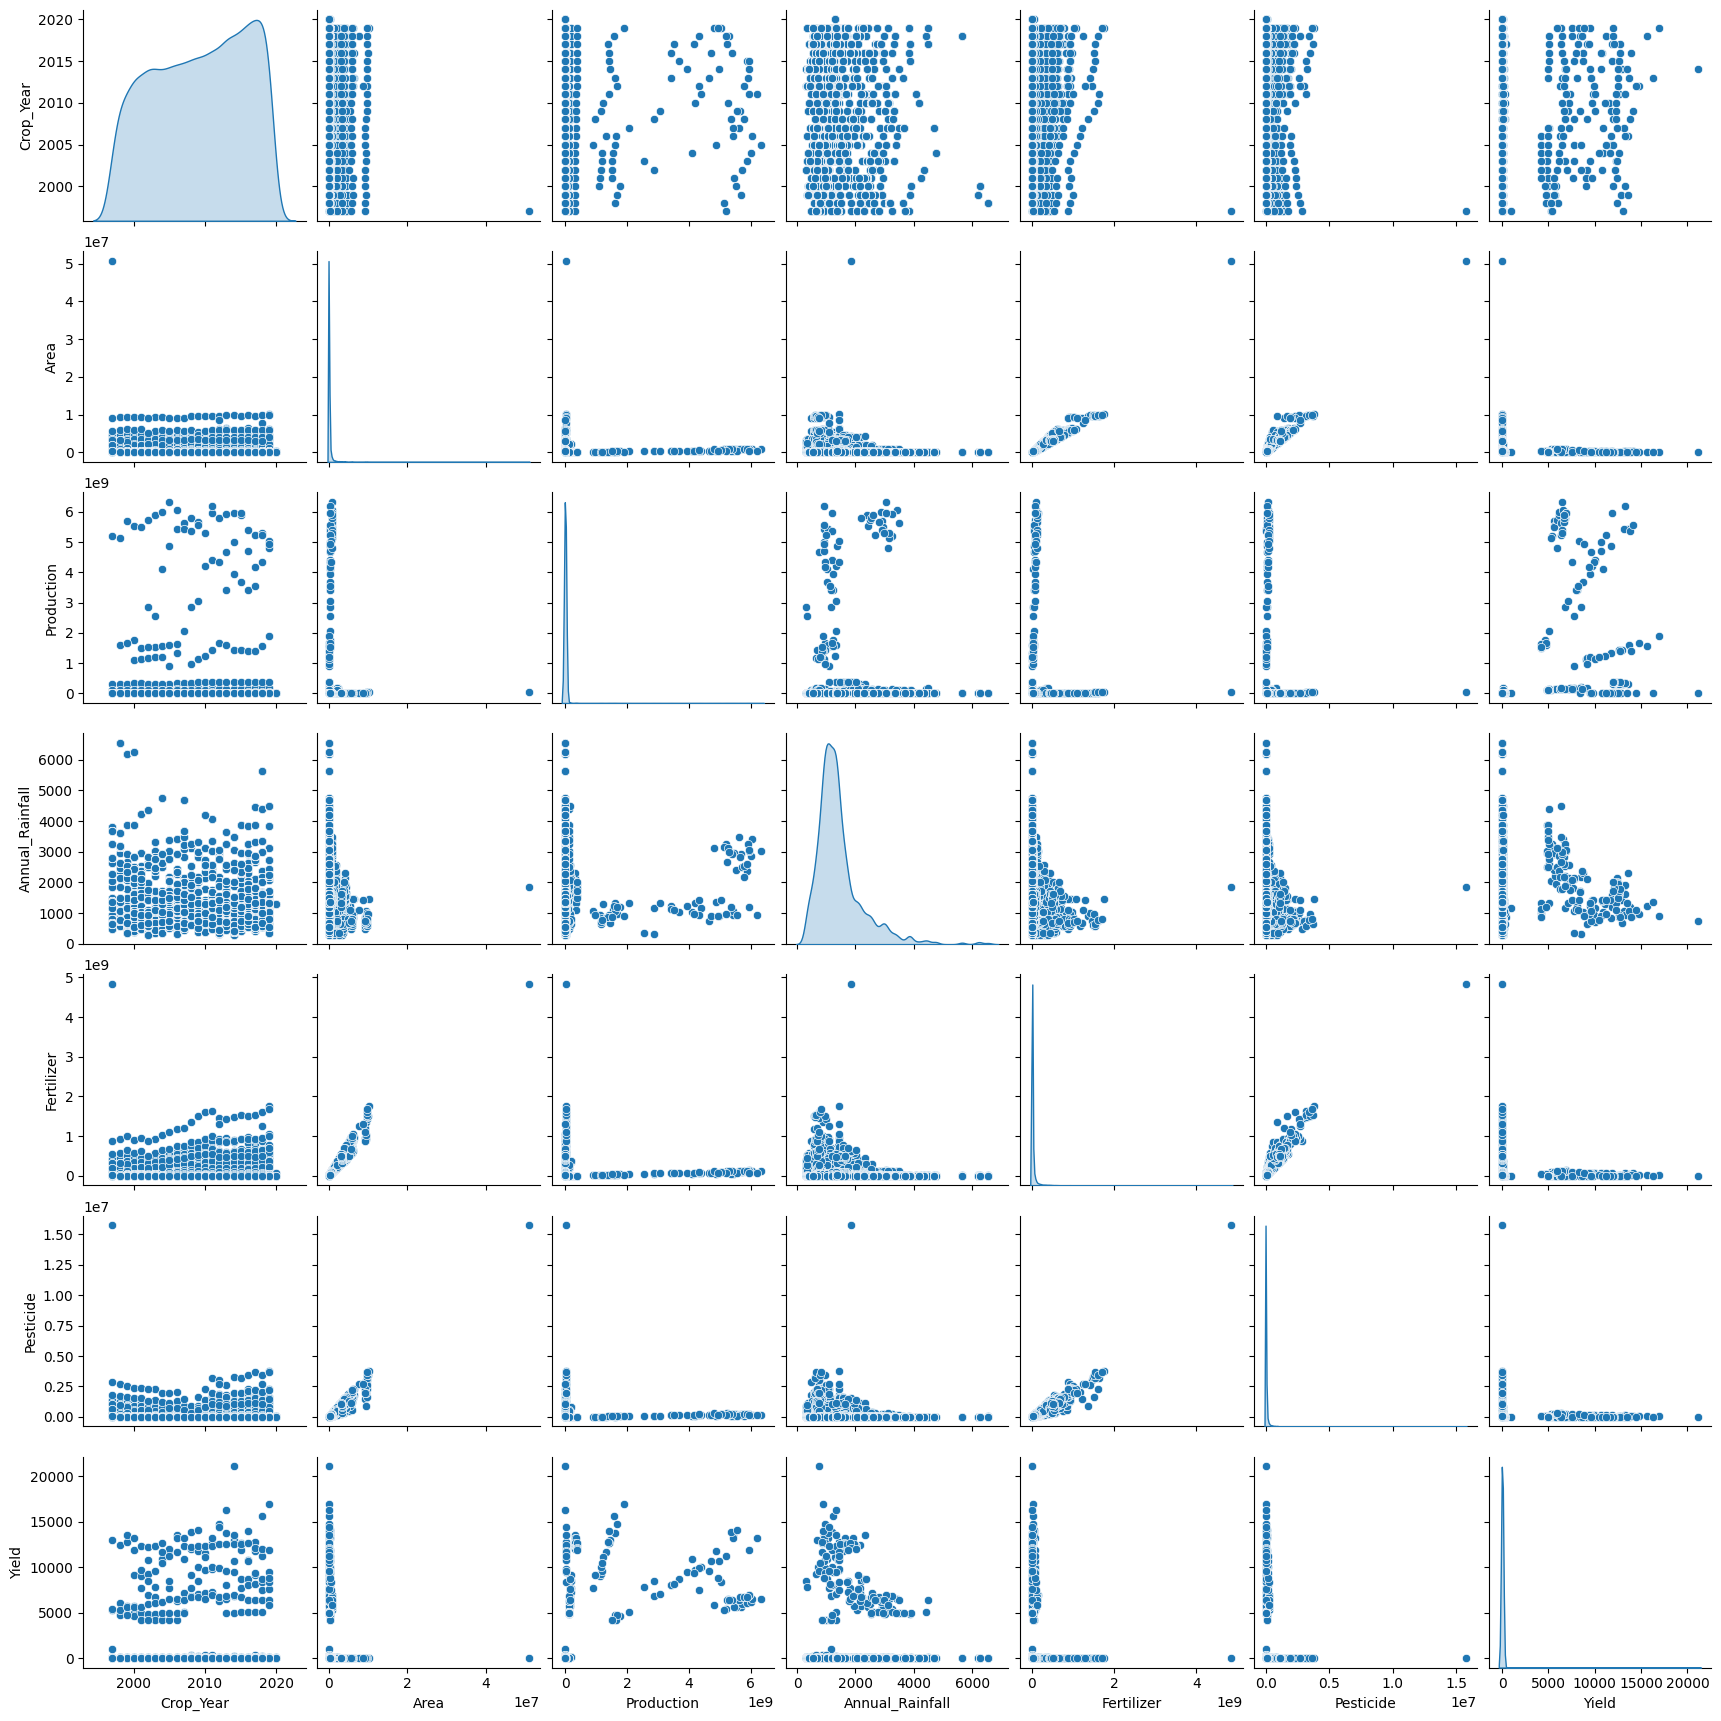

In [6]:
sns.pairplot(df, diag_kind='kde')

# Display the plot
plt.show()

In [7]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X = np.hstack(( df[['Crop_Year']],df[['Area']],df[['Production']],df[['Annual_Rainfall']],df[['Fertilizer']],df[['Pesticide']]))
y=df['Yield']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()# Train the model with training data and checking the score
model.fit(X_train, y_train)
model.score(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [18]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Crop', 'Season', 'State']


In [20]:
correlation_matrix = df[['Fertilizer', 'Pesticide', 'Yield']].corr()
print(correlation_matrix)


            Fertilizer  Pesticide     Yield
Fertilizer    1.000000   0.954991  0.002862
Pesticide     0.954991   1.000000  0.001782
Yield         0.002862   0.001782  1.000000


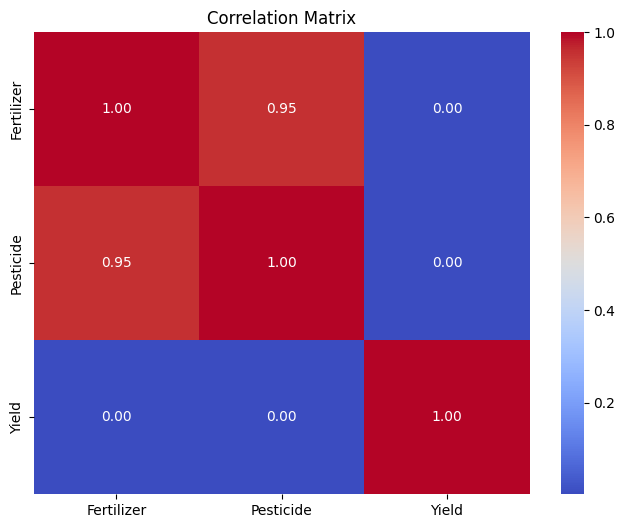

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title
plt.title('Correlation Matrix')
plt.show()

DESCRIPTIVE STATISTICS


In [22]:
desc_stats = df[['Fertilizer', 'Pesticide', 'Yield']].agg(['mean', 'median', 'std']).T
print(desc_stats)

# Group by State and Crop to see regional and crop-specific statistics
grouped_stats = df.groupby(['State', 'Crop']).agg({
    'Fertilizer': ['mean', 'median', 'std'],
    'Pesticide': ['mean', 'median', 'std'],
    'Yield': ['mean', 'median', 'std']
}).reset_index()

# Display the grouped statistics
print(grouped_stats)

                    mean      median           std
Fertilizer  2.410331e+07  1234957.44  9.494600e+07
Pesticide   4.884835e+04     2421.90  2.132874e+05
Yield       7.995401e+01        1.03  8.783062e+02
              State          Crop    Fertilizer                              \
                                           mean        median           std   
0    Andhra Pradesh      Arecanut  7.286175e+04  7.076671e+04  4.515654e+04   
1    Andhra Pradesh     Arhar/Tur  2.774986e+07  2.641653e+07  2.884484e+07   
2    Andhra Pradesh         Bajra  4.432832e+06  3.395170e+06  3.841662e+06   
3    Andhra Pradesh        Banana  7.882546e+06  8.611141e+06  3.161611e+06   
4    Andhra Pradesh  Black pepper  1.515642e+06  1.515642e+06  2.142624e+06   
..              ...           ...           ...           ...           ...   
990     West Bengal     Sunflower  9.626166e+05  1.107626e+06  6.144732e+05   
991     West Bengal       Tobacco  1.846726e+06  1.817609e+06  5.857588e+05   
992   

WHEN WE ANALYSE THE MEAN MEDIAN AND STANDARD DEVIATIONS WE CAN FIND THAT THERE IS A LARGE DIFFERENCE BETWEEN THE MEAN AND THE MEDIAN SO WE CAN CONCLUDE THAT THE GIVEN DATASET HAVE SOME OUTLIERS SO WE NEED TO HANDLE THEM 

VISUALISATIONS

BOX PLOTS 

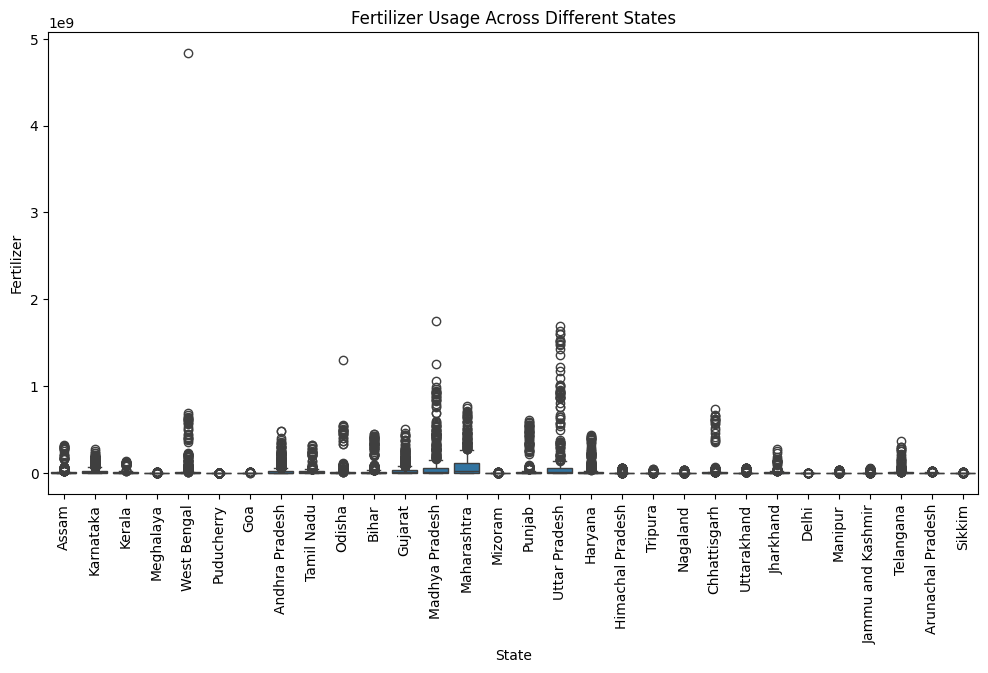

In [24]:
# Box plot for Fertilizer usage across different States
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Fertilizer', data=df)
plt.xticks(rotation=90)
plt.title('Fertilizer Usage Across Different States')
plt.show()



Impact of Fertilizer and Pesticide on Yield:

How does the amount of fertilizer used affect crop yield across different crops and states?

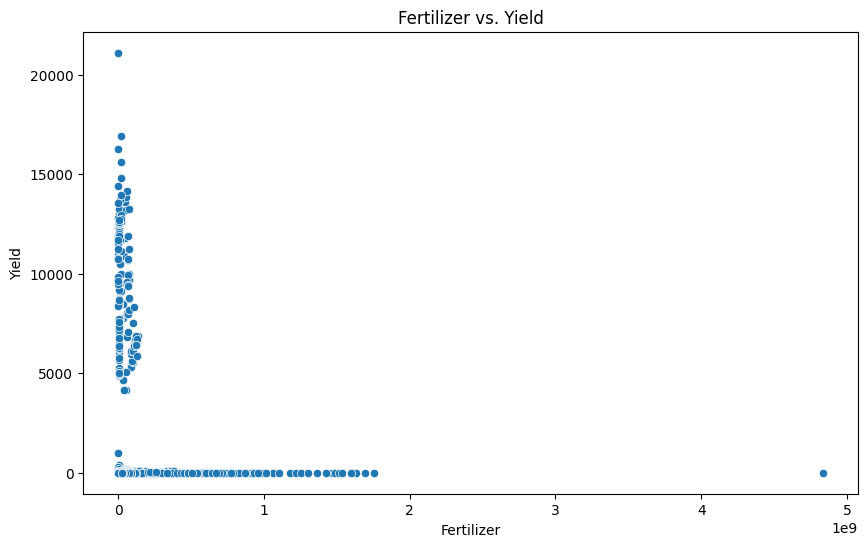

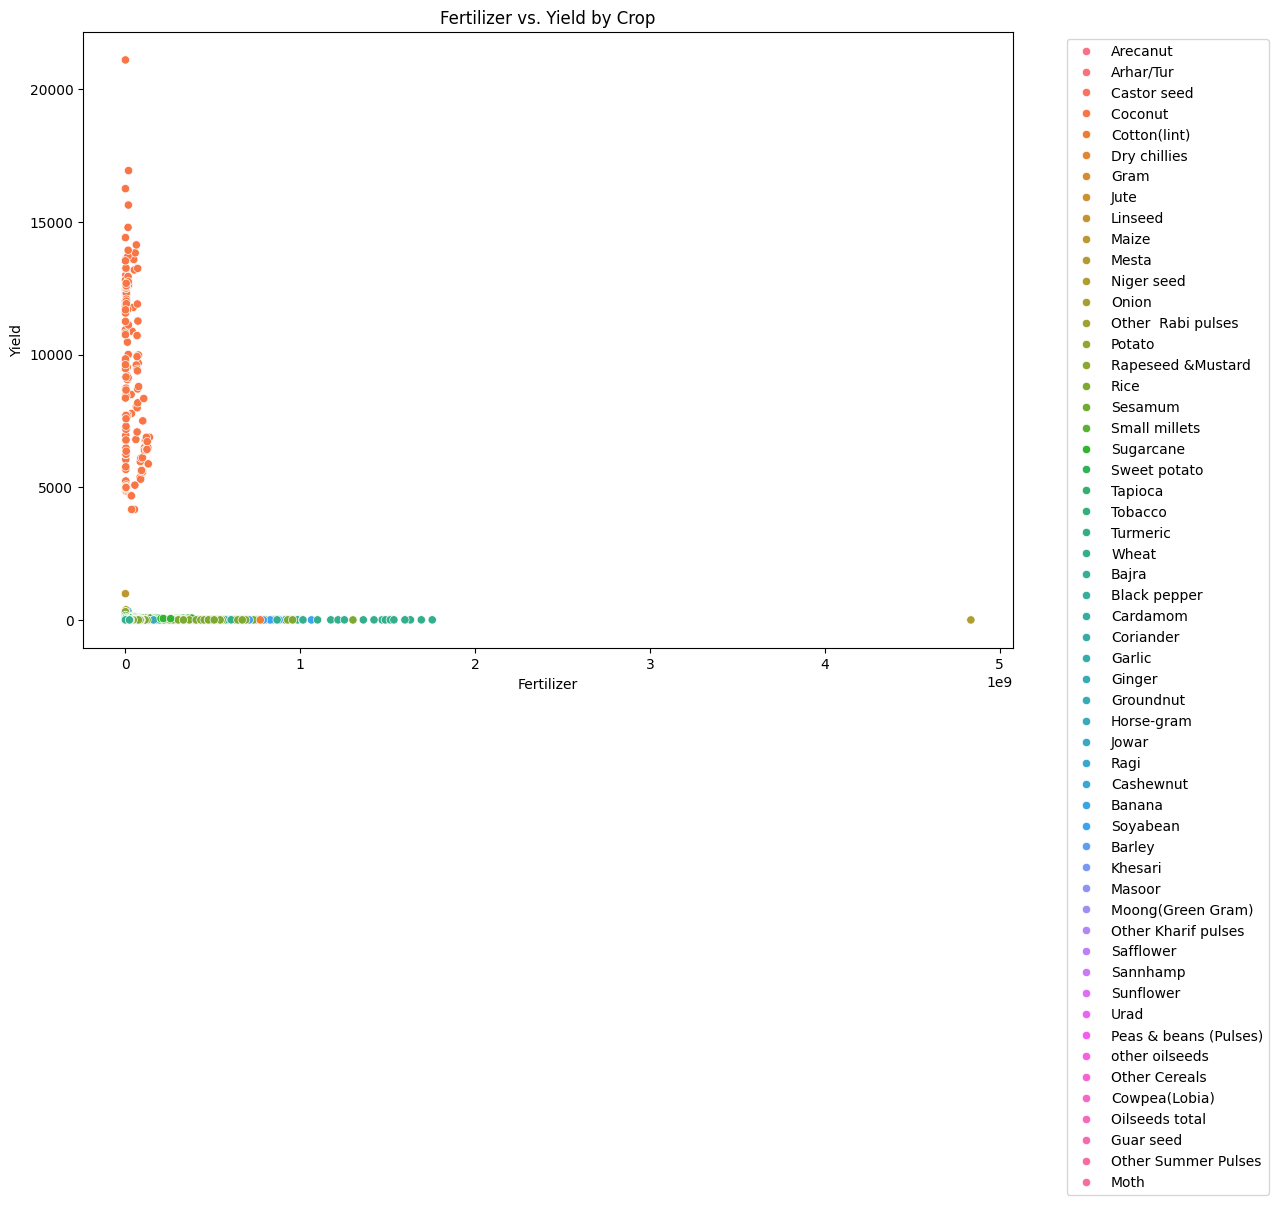

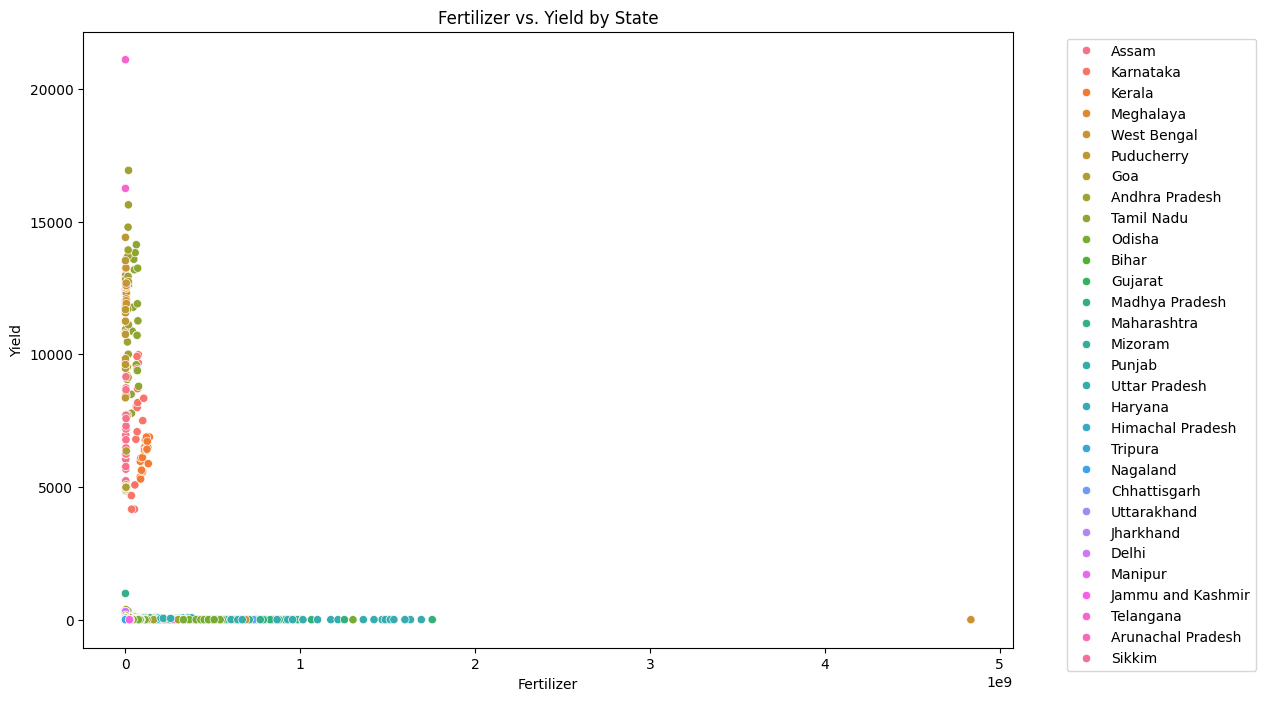

In [25]:
# Scatter plot for Fertilizer vs. Yield for all data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fertilizer', y='Yield', data=df)
plt.title('Fertilizer vs. Yield')
plt.show()

# Scatter plot for Fertilizer vs. Yield grouped by Crop
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fertilizer', y='Yield', hue='Crop', data=df)
plt.title('Fertilizer vs. Yield by Crop')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot for Fertilizer vs. Yield grouped by State
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fertilizer', y='Yield', hue='State', data=df)
plt.title('Fertilizer vs. Yield by State')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

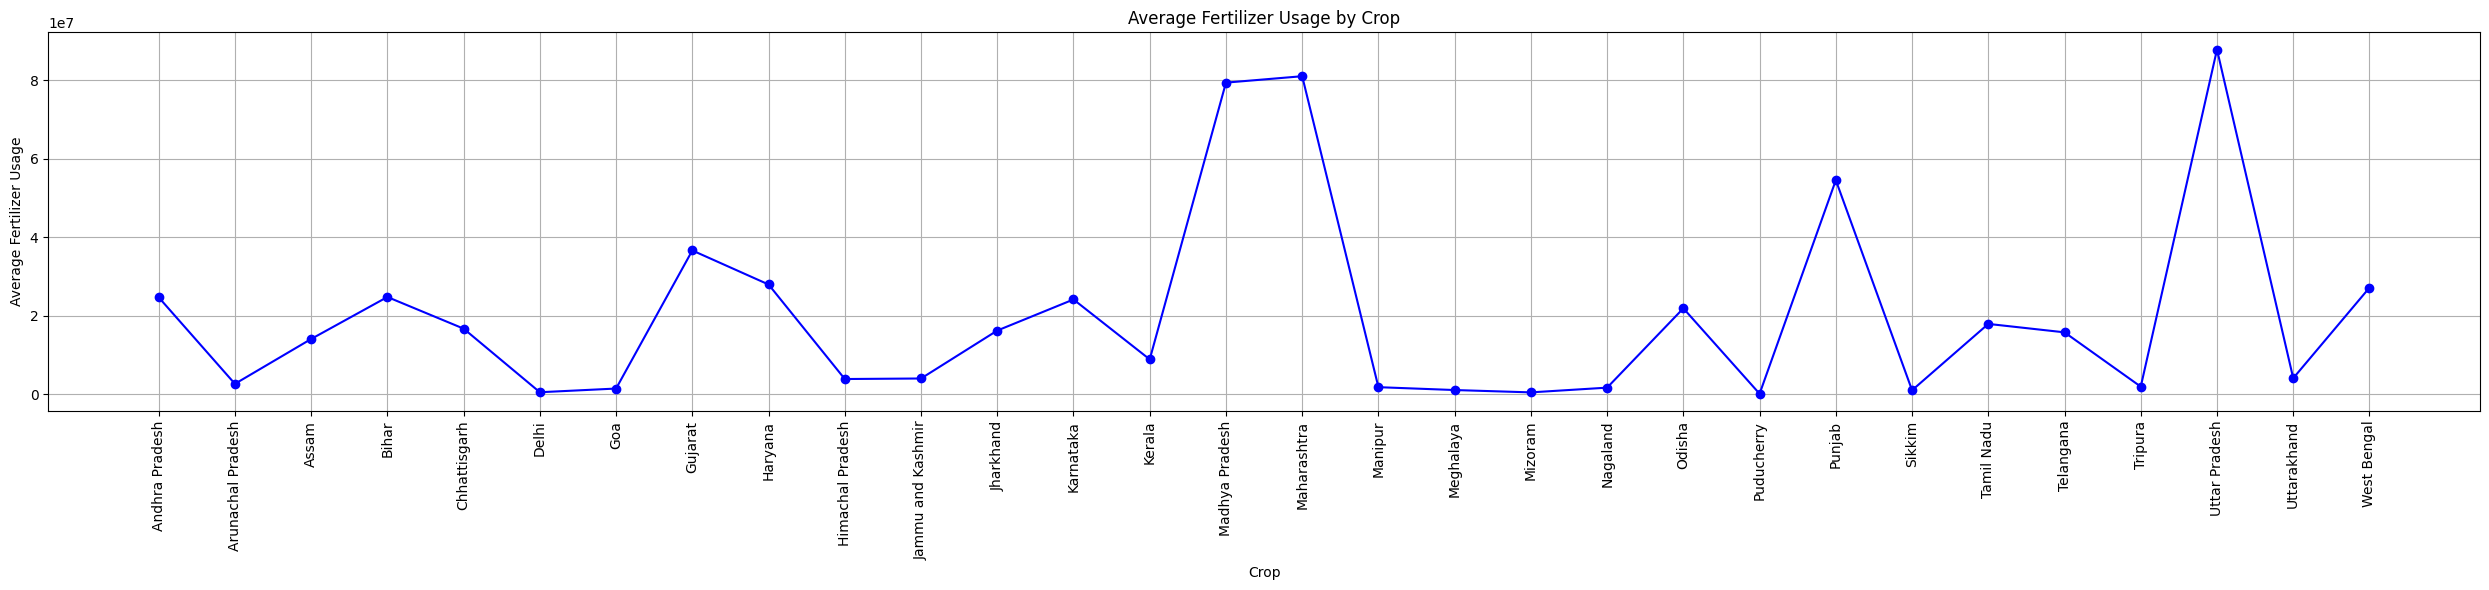

In [35]:
mean_fertilizer = df.groupby('State')['Fertilizer'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(25, 6))
plt.plot(mean_fertilizer['State'], mean_fertilizer['Fertilizer'], marker='o', linestyle='-', color='b')
plt.title('Average Fertilizer Usage by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Fertilizer Usage')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
mean_fertilizer = df.groupby('Crop')['Fertilizer'].mean().reset_index()


plt.figure(figsize=(25, 6))
plt.plot(mean_fertilizer['Crop'], mean_fertilizer['Fertilizer'],mean_fertilizer['Yield'], marker='o', linestyle='-', color='b')
plt.title('Average Fertilizer Usage by Crop')
plt.xlabel('Crop')
plt.ylabel('Average Fertilizer Usage')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

KeyError: 'Yield'

<Figure size 2500x600 with 0 Axes>

In [41]:
# Remove outliers'
cleaned_data = df[~((df[['Fertilizer', 'Yield']] < (Q1 - 1.5 * IQR)) | (df[['Fertilizer', 'Yield']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scatter plot without outliers
sns.scatterplot(x='Fertilizer', y='Yield', data=cleaned_data)
plt.title('Fertilizer vs Yield (Without Outliers)')
plt.show()


NameError: name 'Q1' is not defined

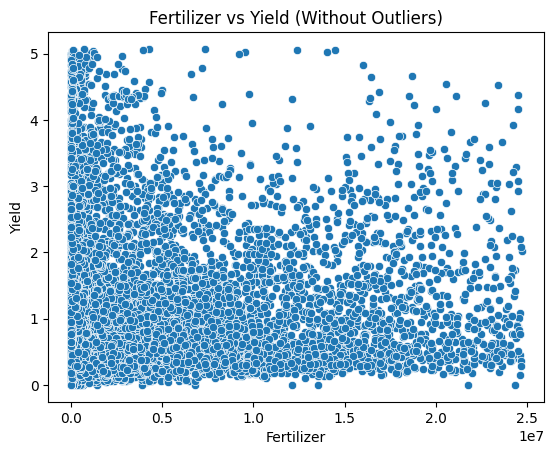

In [42]:
Q1 = df[['Fertilizer', 'Yield']].quantile(0.25)
Q3 = df[['Fertilizer', 'Yield']].quantile(0.75)
IQR = Q3 - Q1
# Remove outliers'
cleaned_data = df[~((df[['Fertilizer', 'Yield']] < (Q1 - 1.5 * IQR)) | (df[['Fertilizer', 'Yield']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scatter plot without outliers
sns.scatterplot(x='Fertilizer', y='Yield', data=cleaned_data)
plt.title('Fertilizer vs Yield (Without Outliers)')
plt.show()